In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("A1.5 Calificaciones.csv")

# Mostrar datos
print(df.head())
print(df.dtypes)

  Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  G3
0      GP    F    18               2           0       no       6   5   6   6
1      GP    F    17               2           0      yes       4   5   5   6
2      GP    F    15               2           3      yes      10   7   8  10
3      GP    F    15               3           0      yes       2  15  14  15
4      GP    F    16               2           0       no       4   6  10  10
Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


En primer lugar descargue la base de datos al programa y imprimi que tipo de variables son las dadas para poder transformar las que se tienen que transformar.

In [ ]:
# Convertir variables categóricas en dummies
df["Escuela"] = df["Escuela"].map({"GP": 0, "MS": 1})
df["Sexo"] = df["Sexo"].map({"F": 0, "H": 1})
df["Internet"] = df["Internet"].map({"yes": 1, "no": 0})

# Verificar que las variables categóricas han sido transformadas
print(df.head())


   Escuela  Sexo  Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  G2  \
0        0   0.0    18               2           0         0       6   5   6   
1        0   0.0    17               2           0         1       4   5   5   
2        0   0.0    15               2           3         1      10   7   8   
3        0   0.0    15               3           0         1       2  15  14   
4        0   0.0    16               2           0         0       4   6  10   

   G3  
0   6  
1   6  
2  10  
3  15  
4  10  


Aqui cambie las variables que no son cuantitativas como que escuela, sexo, internet por unos y ceros.

In [ ]:
# Calcular cuartiles
Q1 = df["Faltas"].quantile(0.25)
Q3 = df["Faltas"].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para valores atípicos
limite_inferior = Q1 - 3 * IQR
limite_superior = Q3 + 3 * IQR

# Filtrar valores atípicos
outliers = df[(df["Faltas"] < limite_inferior) | (df["Faltas"] > limite_superior)]

# Mostrar los valores atípicos
print("Valores atípicos en 'Faltas':")
print(outliers)


Valores atípicos en 'Faltas':
     Escuela  Sexo  Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  \
74         0   0.0    16               2           0         1      54  11   
183        0   0.0    17               2           0         1      56   9   
276        0   0.0    18               2           0         1      75  10   
307        0   NaN    19               1           1         1      38   8   
315        0   0.0    19               3           1         1      40  13   

     G2  G3  
74   12  11  
183   9   8  
276   9   9  
307   9   8  
315  11  11  


Lo que hice aqui fue primero definí mis límites de lo que considero valores falsos. Use el método Tukey con k=3 primero calculando la diferencia entre Q1 y Q3 y de eso multiplicandolo por 3. Cualquiero valor que salga de estos parametros se considera 'outlier'. Decidí que mientras si son muchas faltas me voy a quedar con los datos porque si es una posibilidad que alguien falte tanto por alguna razón de fuerza mayor. También no es como que han reprobado muchísimas clases al punto que ya no deberían estar en la escuela.

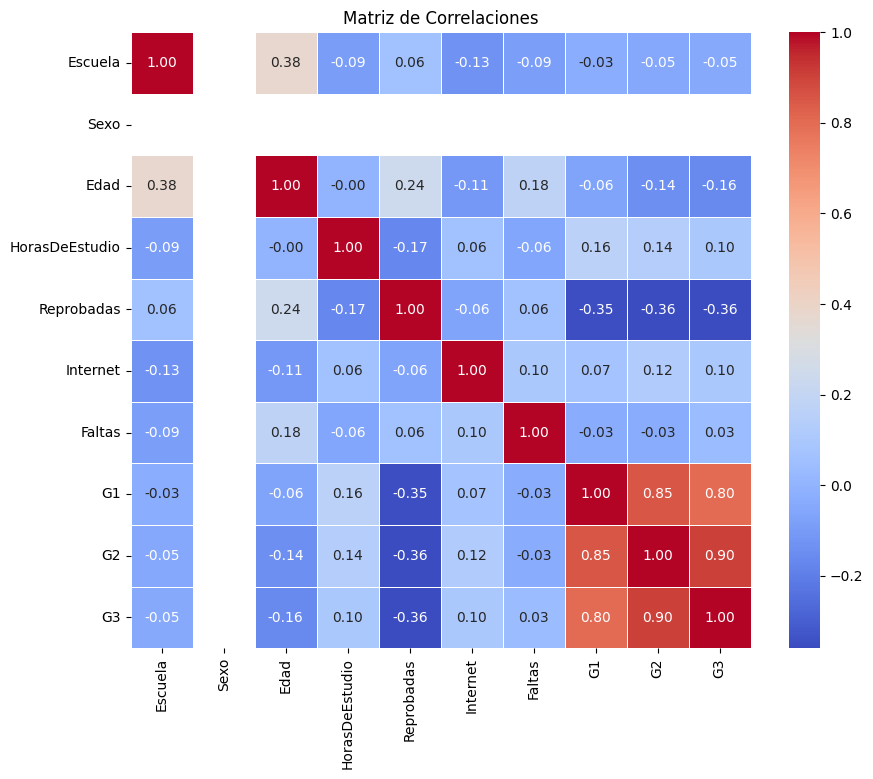

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlaciones
correlation_matrix = df.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()


Aqui genero la matriz de correlaciones usando la libreria de seaborn para visualizar las correlaciones. Como podemos ver, las únicas que tienen alta correlación son G1, G2 y G3 y estas variables son importantes entonces no se deben eliminar.

In [ ]:
# Crear términos de interacción
df["HorasxFaltas"] = df["HorasDeEstudio"] * df["Faltas"]
df["ReprobadasxInternet"] = df["Reprobadas"] * df["Internet"]

#Borro variables que probe anteriormente
df = df.drop(columns=["G1_G2", "HorasFaltas", "ReprobadasInternet"], errors='ignore')

# Mostrar las primeras 5 filas con los nuevos términos
print(df.head())


   Escuela  Sexo  Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  G2  \
0        0   0.0    18               2           0         0       6   5   6   
1        0   0.0    17               2           0         1       4   5   5   
2        0   0.0    15               2           3         1      10   7   8   
3        0   0.0    15               3           0         1       2  15  14   
4        0   0.0    16               2           0         0       4   6  10   

   G3  HorasxFaltas  ReprobadasxInternet  
0   6            12                    0  
1   6             8                    0  
2  10            20                    3  
3  15             6                    0  
4  10             8                    0  


Aqui use mi criterio para ver que par de variables pudiera ser considerada como interactivas entre sí y las multiplique creando una nueva variable. Esta nueva variable quiero que se considere en la regresión porque siento que puede mejorar los resultados.

In [ ]:
import numpy as np

# Reemplazar valores NaN en "Sexo" con 0 o 1 aleatorio
df["Sexo"] = df["Sexo"].apply(lambda x: np.random.randint(0, 2) if pd.isna(x) else int(x))

# Verificar que ya no haya NaN
print(df.dtypes['Sexo'])


int64


Aqui me enfrente un problema inesperado. En los datos había gente que no especifico el sexo y salían como NaN. Cuando traté de correr la regresión me daba un error. Lo que decidí hacer es en las filas que la persona puso NaN, le asigné un valor aleatorio de mujer o hombre. Asi ya todos son integros. Al final verifiqué que ya sea tipo int64 la variable de sexo.

Coeficientes: [ 8.11608263e-02  1.11603538e-01 -1.87446132e-01 -4.03581614e-02
 -3.43240634e-01 -2.23657960e-01  4.38888975e-02  1.59499435e-01
  9.67719300e-01  7.95561664e-04 -4.69136459e-02]
Intercepto: 1.5052400842971334


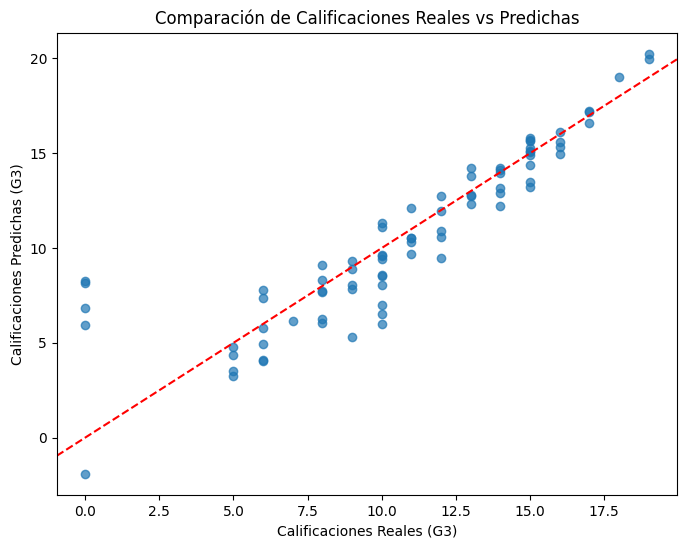

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Separar variables
X = df.drop(columns=["G3"])
y = df["G3"]

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Imprimir coeficientes y el intercepto del modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Graficar valores reales vs valores predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Calificaciones Reales (G3)")
plt.ylabel("Calificaciones Predichas (G3)")
plt.title("Comparación de Calificaciones Reales vs Predichas")
plt.axline([0, 0], slope=1, color="red", linestyle="--")  # Línea de referencia
plt.show()


In [ ]:
# Calcular el R^2 en el conjunto de prueba
r2 = modelo.score(X_test, y_test)

print(f"R² del modelo: {r2:.4f}")


R² del modelo: 0.7849


Haciendo la regresión podemos ver que el valor de la R cuadrada fue de .7849 que pienso que es un modelo muy preciso para el sistema. Si se puede usar para predecir lo que vaya a pasar en G3 de manera relativamente confiable.